In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [ ]:
# Load the dataset
data = pd.read_csv('/content/restaurant-data.csv')

In [ ]:
data.head()

,uid,transactionstarttimeutc,transactionnumber,timestamputc,coursename,coursenumber,coursestarttimeutc,itemcooktime,itemdescription,itemid,itemquantity,itemnumber,parentitemnumber
0,a7bc615a-d5f2-4fe9-afa1-30435898474e,27:02.5,1,28:34.0,ENTREES,1,27:02.5,899,Route Test,4919,1,1,0
1,d5f8e086-81a8-4be9-ad51-28ac6ea3a068,00:00.5,9999,00:06.0,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0
2,3b73f5b0-2063-4163-a11d-58b8c7d190d9,00:00.5,9999,00:17.3,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0
3,d94f0fec-10d5-49f5-9bdc-b5390bb474e8,00:00.5,9999,00:21.9,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0
4,a680cf4f-35a5-4a9f-8dd8-59a7aa71e387,00:00.5,9999,00:38.0,APPETIZERS,15,00:01.6,899,*Please Wash Hands,4919,1,1,0


In [ ]:
data.tail()

,uid,transactionstarttimeutc,transactionnumber,timestamputc,coursename,coursenumber,coursestarttimeutc,itemcooktime,itemdescription,itemid,itemquantity,itemnumber,parentitemnumber
128157,9055582b-27c7-47f7-b923-c7032c68f6cf,26:28.1,393,37:20.4,ENTREES,5,25:39.5,1,SD MARSALA SAUCE,1568,1,6,1
128158,6ffd21ed-4800-46fa-a1ce-e45b75e73616,23:56.8,471,37:27.3,APPETIZERS,2,32:55.7,345,*Dynamite Shrimp,5127,1,1,0
128159,592f47a2-2f96-4fff-9236-ad0395c63e7c,30:02.0,482,37:36.8,ENTREES,1,30:02.0,328,*SK Chop Salad,5338,1,9,0
128160,b754be6f-a2c3-461c-a482-00781b80ac18,30:02.0,482,37:36.8,ENTREES,1,30:02.0,1,Toss w/Dressing,226,1,10,9
128161,f670ee10-ee07-40ad-8080-6c7211b37511,30:02.0,482,37:36.8,ENTREES,1,30:02.0,1,Extra bread please,1568,1,11,9


In [ ]:
data.shape

(128162, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128162 entries, 0 to 128161
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   uid                      128162 non-null  object
 1   transactionstarttimeutc  128162 non-null  object
 2   transactionnumber        128162 non-null  int64 
 3   timestamputc             128162 non-null  object
 4   coursename               128162 non-null  object
 5   coursenumber             128162 non-null  int64 
 6   coursestarttimeutc       128162 non-null  object
 7   itemcooktime             128162 non-null  int64 
 8   itemdescription          128162 non-null  object
 9   itemid                   128162 non-null  int64 
 10  itemquantity             128162 non-null  int64 
 11  itemnumber               128162 non-null  int64 
 12  parentitemnumber         128162 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 12.7+ MB


In [ ]:
data.columns

Index(['uid', 'transactionstarttimeutc', 'transactionnumber', 'timestamputc',
       'coursename', 'coursenumber', 'coursestarttimeutc', 'itemcooktime',
       'itemdescription', 'itemid', 'itemquantity', 'itemnumber',
       'parentitemnumber'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
uid,0
transactionstarttimeutc,0
transactionnumber,0
timestamputc,0
coursename,0
coursenumber,0
coursestarttimeutc,0
itemcooktime,0
itemdescription,0
itemid,0


In [ ]:
data.dtypes

,0
uid,object
transactionstarttimeutc,object
transactionnumber,int64
timestamputc,object
coursename,object
coursenumber,int64
coursestarttimeutc,object
itemcooktime,int64
itemdescription,object
itemid,int64


In [ ]:
# Part 1: Data Preprocessing
data['date'] = pd.to_datetime(data['timestamputc'], errors='coerce').dt.date

<ipython-input-14-30d7253e17cc>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['timestamputc'], errors='coerce').dt.date


In [ ]:
# 2. Aggregate daily sales (sum of itemquantity per day)
daily_sales = data.groupby('date')['itemquantity'].sum().reset_index()
daily_sales.columns = ['date', 'total_sales']

In [ ]:
daily_sales.columns

Index(['date', 'total_sales'], dtype='object')

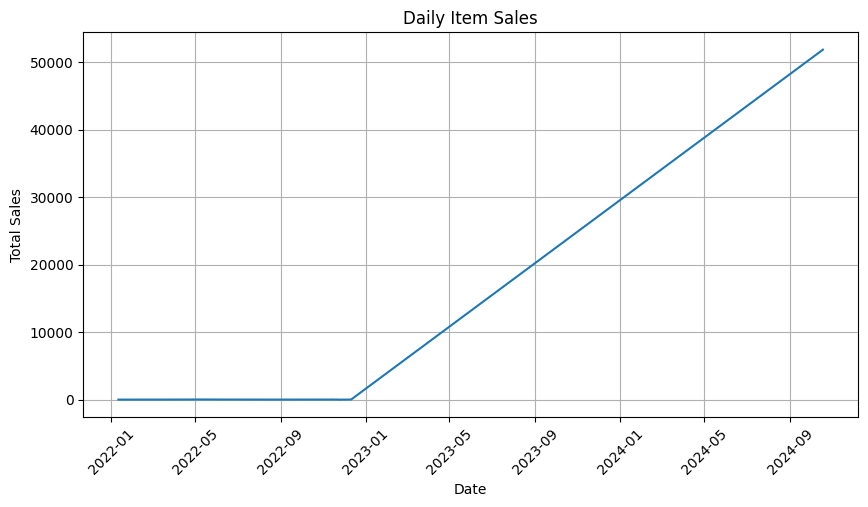

In [ ]:
# Part 2: Exploratory Data Analysis (EDA)
# 1. Plot daily sales
plt.figure(figsize=(10,5))
plt.plot(daily_sales['date'], daily_sales['total_sales'])
plt.title('Daily Item Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# 2. Moving averages (7-day, 30-day)
daily_sales['7_day_MA'] = daily_sales['total_sales'].rolling(window=7).mean()
daily_sales['30_day_MA'] = daily_sales['total_sales'].rolling(window=30).mean()

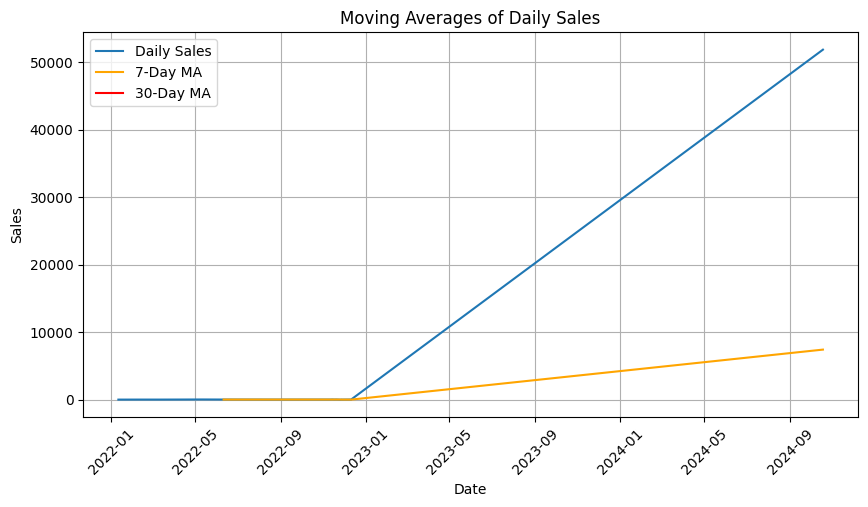

In [ ]:
# Plot moving averages
plt.figure(figsize=(10,5))
plt.plot(daily_sales['date'], daily_sales['total_sales'], label='Daily Sales')
plt.plot(daily_sales['date'], daily_sales['7_day_MA'], label='7-Day MA', color='orange')
plt.plot(daily_sales['date'], daily_sales['30_day_MA'], label='30-Day MA', color='red')
plt.title('Moving Averages of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Part 3: Forecasting
# 1. Split data into training and testing (80% training, 20% testing)
train_data, test_data = train_test_split(daily_sales[['date', 'total_sales']], test_size=0.2, shuffle=False)

In [ ]:
train_data, test_data

(          date  total_sales
 0   2022-01-11            8
 1   2022-01-12           10
 2   2022-02-11           14
 3   2022-03-11           13
 4   2022-04-11           20
 5   2022-05-11           29
 6   2022-06-11           20
 7   2022-07-11           17
 8   2022-08-11           14
 9   2022-09-11           14
 10  2022-10-11           15
 11  2022-11-11           16
 12  2022-11-13           24
 13  2022-11-14           23
 14  2022-11-15           30
 15  2022-11-16           11
 16  2022-11-17           18
 17  2022-11-18           13
 18  2022-11-19           25
 19  2022-11-25            3
 20  2022-11-26            1,
           date  total_sales
 21  2022-11-27           16
 22  2022-11-28            9
 23  2022-11-29            9
 24  2022-11-30           11
 25  2022-12-11           21
 26  2024-10-18        51865)

In [ ]:
train_data

,date,total_sales
0,2022-01-11,8
1,2022-01-12,10
2,2022-02-11,14
3,2022-03-11,13
4,2022-04-11,20
5,2022-05-11,29
6,2022-06-11,20
7,2022-07-11,17
8,2022-08-11,14
9,2022-09-11,14


In [ ]:
 test_data

,date,total_sales
21,2022-11-27,16
22,2022-11-28,9
23,2022-11-29,9
24,2022-11-30,11
25,2022-12-11,21
26,2024-10-18,51865


In [ ]:
# 2. Train ARIMA model
train_sales = train_data['total_sales']
model = ARIMA(train_sales, order=(5,1,0))  # ARIMA(p=5, d=1, q=0)
model_fit = model.fit()

In [ ]:
# 3. Forecast on test data and evaluate
forecast = model_fit.forecast(steps=len(test_data))
rmse = np.sqrt(mean_squared_error(test_data['total_sales'], forecast))
mae = mean_absolute_error(test_data['total_sales'], forecast)
print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 21172.741519136824, MAE: 8654.028032037031


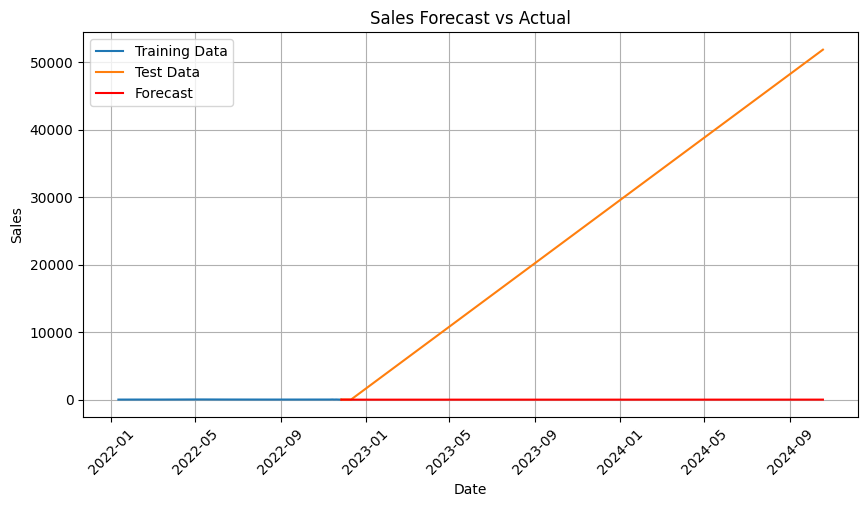

In [ ]:
# 4. Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(train_data['date'], train_sales, label='Training Data')
plt.plot(test_data['date'], test_data['total_sales'], label='Test Data')
plt.plot(test_data['date'], forecast, label='Forecast', color='red')
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

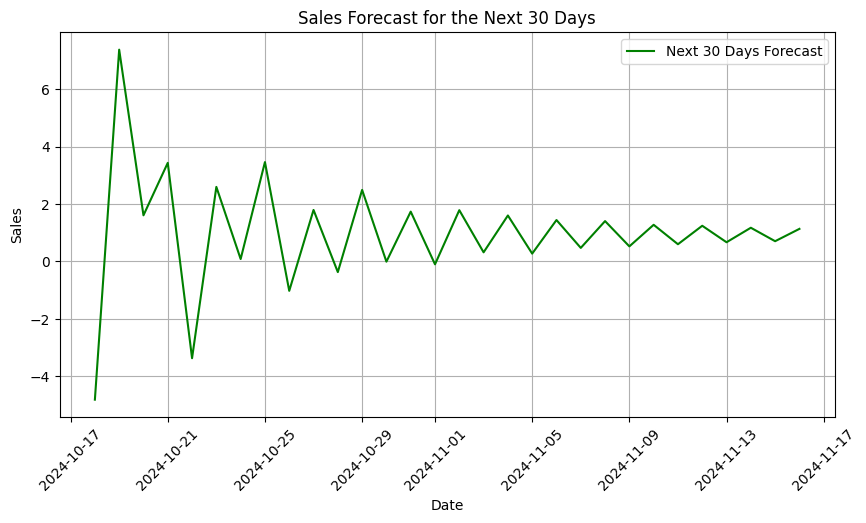

In [ ]:
# 5. Forecast next 30 days
forecast_next_30 = model_fit.forecast(steps=30)
plt.figure(figsize=(10,5))
plt.plot(pd.date_range(test_data['date'].max(), periods=30, freq='D'), forecast_next_30, label='Next 30 Days Forecast', color='green')
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()